In [ ]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [ ]:
# Load Data Viz Pkgs
import seaborn as sns

In [ ]:
pip install neattext


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 KB 10.1 MB/s eta 0:00:00


In [ ]:
import nltk.data

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load Dataset
df = pd.read_csv("c.csv")

In [ ]:
df.head()

,Unnamed: 0,sentence,hate,category
0,5228,যানোয়ারের বাচছারা তোরা। আমার থাকলে তোদের এমন দ...,1.0,religion
1,5229,অন্যের সমেলচনা করে ইউটিউবের টাকা তর মা বাবাকে ...,1.0,religion
2,5230,কিরে তাহেরি তুই বলে পীর তুই বড় শয়তান তুই মুনাফ...,1.0,religion
3,5231,বেয়াদবের বাচ্চা । বাল ডি তো ঠিক মতো উঠছে না ।,1.0,religion
4,5232,এই সব জারজের বুকে ডাইরেক্ট গুলি তবেই ইসলামে শা...,1.0,religion


In [ ]:
df['hate'] = df['hate'].fillna(0)

In [ ]:
df['hate'] = df['hate'].astype(int)

In [ ]:
df = df.drop('Unnamed: 0',axis = 1)

In [ ]:
df.head()

,sentence,hate,category
0,যানোয়ারের বাচছারা তোরা। আমার থাকলে তোদের এমন দ...,1,religion
1,অন্যের সমেলচনা করে ইউটিউবের টাকা তর মা বাবাকে ...,1,religion
2,কিরে তাহেরি তুই বলে পীর তুই বড় শয়তান তুই মুনাফ...,1,religion
3,বেয়াদবের বাচ্চা । বাল ডি তো ঠিক মতো উঠছে না ।,1,religion
4,এই সব জারজের বুকে ডাইরেক্ট গুলি তবেই ইসলামে শা...,1,religion


In [ ]:
df['hate'].value_counts()

0    2457
1    1913
Name: hate, dtype: int64

In [ ]:
df['sentence'][5]

'👏👏👏 ভাই তালি টা ছিলো ওই শালার পাছা মোবারকে👋👋👋👋'

In [ ]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

<Axes: xlabel='hate', ylabel='count'>

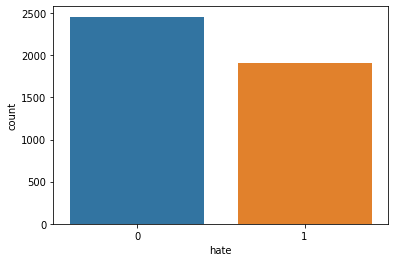

In [ ]:
# Plot
sns.countplot(x='hate',data=df)

In [ ]:
# User handles
df['Clean_Text'] = df['sentence'].apply(nfx.remove_userhandles)

In [ ]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)
df['Clean_Text'] = df['Clean_Text'].apply(remove_html_tags)

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"
    u"\U0001F300-\U0001F5FF"
    u"\U0001F680-\U0001F6FF"
    u"\U0001F1E0-\U0001F1FF"
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'',text)

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(remove_emoji)

In [ ]:
def remove_punc(text):
    line = re.sub('[!@#$।]', '', text)
    return line

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(remove_punc)

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# corpus=[]

# for i in range(0, 4370):
#   text = df['Clean_Text'][i]
#   text = text.split()
#   # text = sent_tokenize(text)
#   text = [ps.stem(word) for word in text if not word in set(all_stopwords)]
#   text = ' '.join(text)
#   corpus.append(text)

In [ ]:
for i in range(0,4370):
  df['Clean_Text'][i] = sent_tokenize(df['Clean_Text'][i])

<ipython-input-27-612e133f04a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Text'][i] = sent_tokenize(df['Clean_Text'][i])


In [ ]:
df['Clean_Text'][5]

[' ভাই তালি টা ছিলো ওই শালার পাছা মোবারকে']

In [ ]:
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('bengali')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]

for i in range(0, 4370):
  text = df['Clean_Text'][i]
  # text = text.split()
  text = [ps.stem(word) for word in text if not word in set(all_stopwords)]
  # text = text.lower()
  text = ' '.join(text)
  corpus.append(text)

In [ ]:
# Features & Labels
Xfeatures = corpus
ylabels = df['hate']

In [ ]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [ ]:
# Build Pipeline
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

In [ ]:
# MLP Pipeline
pipe_mlp = Pipeline(steps=[('cv',CountVectorizer()),('mlp',MLPClassifier(solver='lbfgs', alpha=1e-5,
                  hidden_layer_sizes=(5, 2), random_state=1,batch_size=min(200, 1200),max_iter = 10000))])

In [ ]:
# Train and Fit Data
pipe_mlp.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('mlp',
                 MLPClassifier(alpha=1e-05, batch_size=200,
                               hidden_layer_sizes=(5, 2), max_iter=10000,
                               random_state=1, solver='lbfgs'))])

In [ ]:
pipe_mlp

Pipeline(steps=[('cv', CountVectorizer()),
                ('mlp',
                 MLPClassifier(alpha=1e-05, batch_size=200,
                               hidden_layer_sizes=(5, 2), max_iter=10000,
                               random_state=1, solver='lbfgs'))])

In [ ]:
# Check Accuracy
pipe_mlp.score(x_test,y_test)

0.6803966437833715

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
y_pred = pipe_mlp.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6803966437833715

In [ ]:
precision_score(y_test,y_pred)

0.6585365853658537

In [ ]:
recall_score(y_test,y_pred)

0.6289517470881864

In [ ]:
f1_score(y_test,y_pred)

0.6434042553191489

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       710
           1       0.66      0.63      0.64       601

    accuracy                           0.68      1311
   macro avg       0.68      0.68      0.68      1311
weighted avg       0.68      0.68      0.68      1311



In [ ]:
cf_matrix_mlp = confusion_matrix(y_test,y_pred)

In [ ]:
cf_matrix_mlp

array([[514, 196],
       [223, 378]])

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
sns.heatmap(cf_matrix_mlp/np.sum(cf_matrix_mlp), annot=True,
            fmt='.2%', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Make A Prediction
ex1 = "হুজুর অনেক ভালো"

In [ ]:
pipe_mlp.predict([ex1])

array([0])

## Logistic Regression


In [ ]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer(max_features=1420)),('lr',LogisticRegression(solver ='lbfgs', random_state=0,max_iter=10000))])

In [ ]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer(max_features=1420)),
                ('lr', LogisticRegression(max_iter=10000, random_state=0))])

In [ ]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6796338672768879

In [ ]:
y_pred1 = pipe_lr.predict(x_test)

In [ ]:
precision_score(y_test,y_pred1)

0.6881496881496881

In [ ]:
recall_score(y_test,y_pred1)

0.5507487520798668

In [ ]:
f1_score(y_test,y_pred1)

0.6118299445471349

In [ ]:
cf_matrix_lr = confusion_matrix(y_test,y_pred1)

In [ ]:
cf_matrix_lr

array([[560, 150],
       [270, 331]])

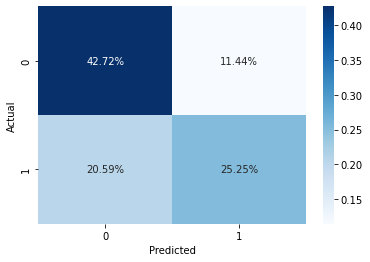

In [ ]:
sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True,
            fmt='.2%', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
#SVC Pipeline
# pipe_svc = Pipeline(steps=[('cv',CountVectorizer(max_features=1420)),('svc',SVC(C=1.0, kernel='linear', degree=3, gamma='auto'))])
#SVC Pipeline
pipe_svc = Pipeline(steps=[('cv',CountVectorizer(max_features=1420)),('svc',SVC(C = 1.0,probability = True))])

In [ ]:
# Train and Fit Data
pipe_svc.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer(max_features=1420)),
                ('svc', SVC(probability=True))])

In [ ]:
# Check Accuracy
pipe_svc.score(x_test,y_test)

0.7032799389778794

In [ ]:
y_pred2 = pipe_svc.predict(x_test)

In [ ]:
precision_score(y_test,y_pred2)

0.7145748987854251

In [ ]:
recall_score(y_test,y_pred2)

0.5873544093178037

In [ ]:
f1_score(y_test,y_pred2)

0.6447488584474886

In [ ]:
# Make A Prediction
ex1 = "তাহেরি এর বাচ্চা এ রাস্তায় পাইলে ফালাইয়া পিটামু"
pipe_svc.predict([ex1])

array([1])

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe_svc, open('svc.pkl', 'wb'))

In [ ]:
cf_matrix_svc = confusion_matrix(y_test,y_pred2)

In [ ]:
cf_matrix_svc

array([[569, 141],
       [248, 353]])

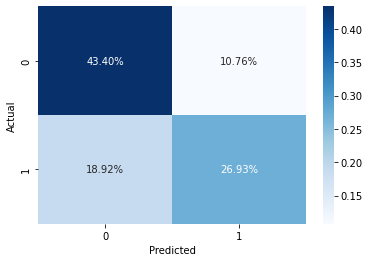

In [ ]:
sns.heatmap(cf_matrix_svc/np.sum(cf_matrix_svc), annot=True,
            fmt='.2%', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Naive-Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#Naive-Bayes Pipeline
pipe_nb = Pipeline(steps=[('cv',CountVectorizer(max_features=1420)),('nb',MultinomialNB())])

In [ ]:
# Train and Fit Data
pipe_nb.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer(max_features=1420)),
                ('nb', MultinomialNB())])

In [ ]:
# Check Accuracy
pipe_nb.score(x_test,y_test)

0.6727688787185355

In [ ]:
y_pred3 = pipe_nb.predict(x_test)

In [ ]:
precision_score(y_test,y_pred3)

0.6791666666666667

In [ ]:
recall_score(y_test,y_pred3)

0.5424292845257903

In [ ]:
f1_score(y_test,y_pred3)

0.6031452358926919

In [ ]:
cf_matrix_nb = confusion_matrix(y_test,y_pred3)

In [ ]:
cf_matrix_nb

array([[556, 154],
       [275, 326]])

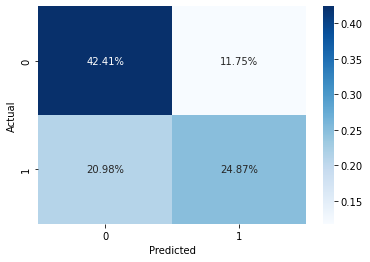

In [ ]:
sns.heatmap(cf_matrix_nb/np.sum(cf_matrix_nb), annot=True,
            fmt='.2%', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
y_train_nb = pipe_nb.predict(x_train)

In [ ]:
y_train_nb

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
len(y_train_nb)

3059

In [ ]:
y_train_arr = np.array(y_train)

In [ ]:
type(y_train_arr)

numpy.ndarray

In [ ]:
y_train_arr

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
len(y_train_arr)

3059

In [ ]:
y_train.value_counts()

0    1747
1    1312
Name: hate, dtype: int64

In [ ]:
type(y_pred3)

numpy.ndarray

In [ ]:
# Check Training Accuracy
print(f"Training_Accuracy_for_Naive_Bayes : {accuracy_score(y_train, y_train_nb)*100}%\n")

Training_Accuracy_for_Naive_Bayes : 74.63223275580255%



In [ ]:
print('accuracy: {:.2f}%'.format(100*accuracy_score(y_train, y_train_nb)))

accuracy: 74.63%


In [ ]:
print('precision: {:.2f}%'.format(100*precision_score(y_train, y_train_nb)))

precision: 72.41%


In [ ]:
print('recall: {:.2f}%'.format(100*recall_score(y_train, y_train_nb)))

recall: 66.01%


In [ ]:
print('f1_score: {:.2f}%'.format(100*f1_score(y_train, y_train_nb)))

f1_score: 69.06%


## Add two models

### Logistic + SVM

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
model1 = VotingClassifier(
    estimators=[('lr', pipe_lr),('svc', pipe_svc)],voting='soft')

In [ ]:
model1.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('cv',
                                               CountVectorizer(max_features=1420)),
                                              ('lr',
                                               LogisticRegression(max_iter=10000,
                                                                  random_state=0))])),
                             ('svc',
                              Pipeline(steps=[('cv',
                                               CountVectorizer(max_features=1420)),
                                              ('svc',
                                               SVC(probability=True))]))],
                 voting='soft')

In [ ]:
model1_pred = model1.predict(x_test)

In [ ]:
def result(y_test,y_pred):
  print('Accuracy: {:.2f}%'.format(100*accuracy_score(y_test,y_pred)))
  print('Precision: {:.2f}%'.format(100*precision_score(y_test,y_pred)))
  print('Recall: {:.2f}%'.format(100*recall_score(y_test,y_pred)))
  print('F1_score: {:.2f}%'.format(100*f1_score(y_test,y_pred)))

In [ ]:
print("Logistic Regression + Support Vector Classifier")
result(y_test,model1_pred)

Logistic Regression + Support Vector Classifier
Accuracy: 69.18%
Precision: 71.46%
Recall: 54.58%
F1_score: 61.89%


### LR + MLP

In [ ]:
model2 = VotingClassifier(
    estimators=[('lr', pipe_lr),('mlp', pipe_mlp)],voting='soft')

In [ ]:
model2.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('cv',
                                               CountVectorizer(max_features=1420)),
                                              ('lr',
                                               LogisticRegression(max_iter=10000,
                                                                  random_state=0))])),
                             ('mlp',
                              Pipeline(steps=[('cv', CountVectorizer()),
                                              ('mlp',
                                               MLPClassifier(alpha=1e-05,
                                                             batch_size=200,
                                                             hidden_layer_sizes=(5,
                                                                                 2),
                                                             max_iter=10000,
                                                             random_state=1,
                                                             solver='lbfgs'))]))],
                 voting='soft')

In [ ]:
model2_pred = model2.predict(x_test)

In [ ]:
print("Logistic Regression + Multi-Layer Perceptron")
result(y_test,model2_pred)

Logistic Regression + Multi-Layer Perceptron
Accuracy: 68.65%
Precision: 66.49%
Recall: 63.73%
F1_score: 65.08%


### LR + NB

In [ ]:
model3 = VotingClassifier(
    estimators=[('lr', pipe_lr),('nb', pipe_nb)],voting='soft')

In [ ]:
model3.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('cv',
                                               CountVectorizer(max_features=1420)),
                                              ('lr',
                                               LogisticRegression(max_iter=10000,
                                                                  random_state=0))])),
                             ('nb',
                              Pipeline(steps=[('cv',
                                               CountVectorizer(max_features=1420)),
                                              ('nb', MultinomialNB())]))],
                 voting='soft')

In [ ]:
model3_pred = model3.predict(x_test)

In [ ]:
print("Logistic Regression + Multi-Layer Perceptron")
result(y_test,model3_pred)

Logistic Regression + Multi-Layer Perceptron
Accuracy: 68.12%
Precision: 69.02%
Recall: 55.24%
F1_score: 61.37%


### SVM + MLP

In [ ]:
model4 = VotingClassifier(
    estimators=[('svc', pipe_svc),('mlp', pipe_mlp)],voting='soft')
model4.fit(x_train,y_train)
model4_pred = model4.predict(x_test)

In [ ]:
print("Support Vector Classifier + Multi-Layer Perceptron")
result(y_test,model4_pred)

Support Vector Classifier + Multi-Layer Perceptron
Accuracy: 68.27%
Precision: 66.14%
Recall: 63.06%
F1_score: 64.57%


### SVM + NB

In [ ]:
model5 = VotingClassifier(
    estimators=[('svc', pipe_svc),('nb', pipe_nb)],voting='soft')
model5.fit(x_train,y_train)
model5_pred = model5.predict(x_test)

In [ ]:
print("Support Vector Classifier + Naive-Bayes")
result(y_test,model5_pred)

Support Vector Classifier + Naive-Bayes
Accuracy: 68.27%
Precision: 69.81%
Recall: 54.24%
F1_score: 61.05%


### MLP + NB

In [ ]:
model6 = VotingClassifier(
    estimators=[('mlp', pipe_mlp),('nb', pipe_nb)],voting='soft')
model6.fit(x_train,y_train)
model6_pred = model6.predict(x_test)

In [ ]:
print("Multi-Layer Perceptron + Naive-Bayes")
result(y_test,model6_pred)

Multi-Layer Perceptron + Naive-Bayes
Accuracy: 68.65%
Precision: 66.49%
Recall: 63.73%
F1_score: 65.08%


### LR + MLP + SVC

In [ ]:
model7 = VotingClassifier(
    estimators=[('lr', pipe_lr),('mlp', pipe_mlp),('svc', pipe_svc)],voting='hard')
model7.fit(x_train,y_train)
model7_pred = model7.predict(x_test)

In [ ]:
print("LR + MLP + SVC")
result(y_test,model7_pred)

LR + MLP + SVC
Accuracy: 70.48%
Precision: 69.96%
Recall: 62.40%
F1_score: 65.96%


### LR + MLP + NB

In [ ]:
model8 = VotingClassifier(
    estimators=[('lr', pipe_lr),('mlp', pipe_mlp),('nb', pipe_nb)],voting='soft')
model8.fit(x_train,y_train)
model8_pred = model8.predict(x_test)

In [ ]:
print("LR + MLP + NB")
result(y_test,model8_pred)

LR + MLP + NB
Accuracy: 69.49%
Precision: 67.72%
Recall: 63.89%
F1_score: 65.75%


LR + SVC + NB

In [ ]:
model9 = VotingClassifier(
    estimators=[('lr', pipe_lr),('svc', pipe_svc),('nb', pipe_nb)],voting='hard')
model9.fit(x_train,y_train)
model9_pred = model9.predict(x_test)

In [ ]:
print("LR + SVC + NB")
result(y_test,model9_pred)

LR + SVC + NB
Accuracy: 69.34%
Precision: 71.96%
Recall: 54.24%
F1_score: 61.86%


### SVC + MLP + NB

In [ ]:
model10 = VotingClassifier(
    estimators=[('svc', pipe_svc),('mlp', pipe_mlp),('nb', pipe_nb)],voting='hard')
model10.fit(x_train,y_train)
model10_pred = model10.predict(x_test)

In [ ]:
print("SVC + MLP + NB")
result(y_test,model10_pred)

SVC + MLP + NB
Accuracy: 70.33%
Precision: 70.00%
Recall: 61.73%
F1_score: 65.61%
